<a href="https://colab.research.google.com/github/Dami442/Worker-Absenteeism-Prediction/blob/main/Prediction_of_Workers'_Absenteeism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting Absenteeism using Machine learning

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [105]:
# option to diplay max columns
pd.options.display.max_columns = None
pd.options.display.max_columns = None

Import Dataset in CSV format from UCI

In [106]:
raw_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Data/Absenteeism_at_work.csv", sep=";")

In [107]:
raw_df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [108]:
# drop unneccessary columns
raw_df1 = raw_df.drop(['Service time','Hit target', 'Seasons', 'Social drinker', 'Social smoker', 'Weight', 'Height', 'Disciplinary failure'], axis=1)

In [109]:
raw_df1.head(2)

,ID,Reason for absence,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Education,Son,Pet,Body mass index,Absenteeism time in hours
0,11,26,7,3,289,36,33,239.554,1,2,1,30,4
1,36,0,7,3,118,13,50,239.554,1,1,0,31,0


In [110]:
type(raw_df1)

pandas.core.frame.DataFrame

In [111]:
# create a copy of the df
df = raw_df1.copy()
df.sample(3)

,ID,Reason for absence,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Education,Son,Pet,Body mass index,Absenteeism time in hours
644,22,23,3,6,179,26,30,222.196,3,0,0,19,2
149,27,23,2,3,184,42,27,302.585,1,0,0,21,8
477,24,28,7,3,246,25,41,230.290,1,0,0,23,2


Dependent Variable (Target) -> "Absenteeism Time in Hours"

Independent Variable (Features) -> All other columns except for the target

In [112]:
# check info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Transportation expense           740 non-null    int64  
 5   Distance from Residence to Work  740 non-null    int64  
 6   Age                              740 non-null    int64  
 7   Work load Average/day            740 non-null    float64
 8   Education                        740 non-null    int64  
 9   Son                              740 non-null    int64  
 10  Pet                              740 non-null    int64  
 11  Body mass index                  740 non-null    int64  
 12  Absenteeism time in ho

Comments:
While data is completely of numerical dtype, some of the definitions of the columns suggest that some features are categorical, added to the target.


In [113]:
# Check for duplicates
df.duplicated().sum()

np.int64(37)

There are 37 duplicated values. These will be dropped as they are not beneficial to our model

In [114]:
# drop duplicates
df = df.drop_duplicates()

In [115]:
# confirm if there are still any duplicates, if yes, drop them
df.duplicated().sum()

np.int64(0)

No more duplicates. Yay!!

In [116]:
# Check for missing values
df.isnull().sum()

,0
ID,0
Reason for absence,0
Month of absence,0
Day of the week,0
Transportation expense,0
Distance from Residence to Work,0
Age,0
Work load Average/day,0
Education,0
Son,0


Data has no missing values

## Drop irrelevant columns

In [117]:
# drop 'ID' column
df = df.drop(["ID"], axis=1)

In [118]:
# view first five rows of data
df.head()

,Reason for absence,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Education,Son,Pet,Body mass index,Absenteeism time in hours
0,26,7,3,289,36,33,239.554,1,2,1,30,4
1,0,7,3,118,13,50,239.554,1,1,0,31,0
2,23,7,4,179,51,38,239.554,1,0,0,31,2
3,7,7,5,279,5,39,239.554,1,2,0,24,4
4,23,7,5,289,36,33,239.554,1,2,1,30,2


## Reason for Absence

* Each number in this column represents a certain reason why a worker missed or would miss work
* This implies that the column, while having numerical dtypes is in fact a categorical column
* For example, cat "1" is for "certain infectious disease, cat "2" means mental disorder. The list runs through to cat "28"
* This consequentially means there is need to convert this numerical data to categorical type.
For this, ***One Hot Encoding will be used***

In [119]:
# use .describe() method to view stats (min, max, median, etc)
df['Reason for absence'].describe()

,Reason for absence
count,703.000000
mean,18.904694
std,8.463481
min,0.000000
25%,13.000000
50%,23.000000
75%,26.000000
max,28.000000


Comments:

* min -> 0
* max -> 28
* No of observations counted ->  703

In [120]:
# show unique values in a sorted manner
sorted(df['Reason for absence'].unique())

[np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(18),
 np.int64(19),
 np.int64(21),
 np.int64(22),
 np.int64(23),
 np.int64(24),
 np.int64(25),
 np.int64(26),
 np.int64(27),
 np.int64(28)]

This means we have 28 specific reasons why users did not come to work

Using One Hot Encoding to convert to Categorical Dtype

Converting the numeric dtypes to categorical variables implies that:

* There will be a dummy variable '1' if a certain category is present
* '0' will imputed if there's no particular observation

In [121]:
# convert the 'Reason for Absence' entries to dummy variables
reasons_df = pd.get_dummies(df['Reason for absence'], prefix='Reason', dtype=int)

In [122]:
# view the column
reasons_df.head(3)

,Reason_0,Reason_1,Reason_2,Reason_3,Reason_4,Reason_5,Reason_6,Reason_7,Reason_8,Reason_9,Reason_10,Reason_11,Reason_12,Reason_13,Reason_14,Reason_15,Reason_16,Reason_17,Reason_18,Reason_19,Reason_21,Reason_22,Reason_23,Reason_24,Reason_25,Reason_26,Reason_27,Reason_28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


##  Check if each row in the dummy variable DataFrame (reason_df) has exactly one 1 entry

This adds a new column called 'check':

0 → No reason selected (missing or invalid data)

1 → Exactly one reason selected  


In [123]:
reasons_df['check'] = reasons_df.sum(axis=1)

In [124]:
# check if there are missing values
print(len(reasons_df))
print(reasons_df['check'].sum(axis=0))

703
703


In [125]:
# drop 'check' column
reasons_df = reasons_df.drop(['check'], axis=1)

In [126]:
reasons_df.head(3)

,Reason_0,Reason_1,Reason_2,Reason_3,Reason_4,Reason_5,Reason_6,Reason_7,Reason_8,Reason_9,Reason_10,Reason_11,Reason_12,Reason_13,Reason_14,Reason_15,Reason_16,Reason_17,Reason_18,Reason_19,Reason_21,Reason_22,Reason_23,Reason_24,Reason_25,Reason_26,Reason_27,Reason_28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


The first column needs to be dropped and here's why:

Reason 0 implies a certain worker was absent for an unknown cause or reason.

This information is not really important as interests are more geared towards understanding specifically stated reasons leading to absence from work. Therefore, dropping this column allows for more focus on analysing reasons that are known.

For other columns in the reasons_df dataframe starting from Reason_1 are known reasons for absence from work:

If the observation is 1, it implies there is a reason corresponding to the reason number (this will be shown later)

In summary: there's a need to remove 'Reason_0' column in order to avoid dummy variable trap



In [127]:
# create n-1 dummy var which drops first column in the original DF

reasons_df = pd.get_dummies(df['Reason for absence'], prefix = 'Reason', dtype=int, drop_first=True)

In [128]:
reasons_df.head(4)

,Reason_1,Reason_2,Reason_3,Reason_4,Reason_5,Reason_6,Reason_7,Reason_8,Reason_9,Reason_10,Reason_11,Reason_12,Reason_13,Reason_14,Reason_15,Reason_16,Reason_17,Reason_18,Reason_19,Reason_21,Reason_22,Reason_23,Reason_24,Reason_25,Reason_26,Reason_27,Reason_28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Classifying the different values in the "Reason for absence" column

In [129]:
df.head(3)

,Reason for absence,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Education,Son,Pet,Body mass index,Absenteeism time in hours
0,26,7,3,289,36,33,239.554,1,2,1,30,4
1,0,7,3,118,13,50,239.554,1,1,0,31,0
2,23,7,4,179,51,38,239.554,1,0,0,31,2


In [130]:
df.columns.values

array(['Reason for absence', 'Month of absence', 'Day of the week',
       'Transportation expense', 'Distance from Residence to Work', 'Age',
       'Work load Average/day ', 'Education', 'Son', 'Pet',
       'Body mass index', 'Absenteeism time in hours'], dtype=object)

In [131]:
df['Reason for absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

Since 'Reason for absence column' has same representation as 'reasons_df', there's need to drop it so as to avoid multi-collinearity

In [132]:
# drop 'Reason for Absence column

df = df.drop(['Reason for absence'], axis=1)

In [133]:
df.head(2)

,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Education,Son,Pet,Body mass index,Absenteeism time in hours
0,7,3,289,36,33,239.554,1,2,1,30,4
1,7,3,118,13,50,239.554,1,1,0,31,0


 ## Basis for classifying the reasons_df column

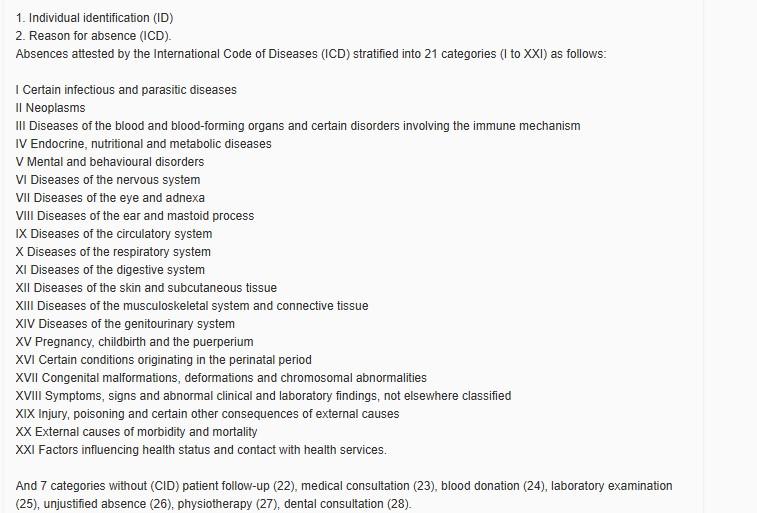

In [134]:
from IPython.display import Image

Image(filename='/content/drive/MyDrive/Colab Notebooks/Images/Reasons.jpg')

* Group 1 -> 1 - 14 = disease related issues
* Group 2 -> 15 - 17 = pregnancy/genital issues
* Group 3 -> 18 - 21 = related to poisoning or harmful stuffs
* Group 4 -> 22 - 28 = light reasons for absence

In [135]:
# create 4 groupings

# select reason_1 - 14
reason_type_1 = reasons_df.loc[:, 'Reason_1':'Reason_14'].max(axis=1)

# select reason_ 15-17
reason_type_2 = reasons_df.loc[:, 'Reason_15': 'Reason_17'].max(axis=1)

# 18-21
reason_type_3 = reasons_df.loc[:, 'Reason_18': 'Reason_21'].max(axis=1)

# 22-28
reason_type_4 = reasons_df.loc[:, 'Reason_22': 'Reason_28'].max(axis=1)

In [136]:
# Show reason type 1
reason_type_1[:5]

,0
0,0
1,0
2,0
3,1
4,0


In [137]:
# show reason type 2
reason_type_2[:5]

,0
0,0
1,0
2,0
3,0
4,0


In [138]:
# type 3
reason_type_3[:5]

,0
0,0
1,0
2,0
3,0
4,0


In [139]:
# type 4
reason_type_4[:5]

,0
0,1
1,0
2,1
3,0
4,1


In [140]:
# concatenate columns

df = pd.concat([df, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis=1)

In [141]:
df.head(3)

,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Education,Son,Pet,Body mass index,Absenteeism time in hours,0,1,2,3
0,7,3,289,36,33,239.554,1,2,1,30,4,0,0,0,1
1,7,3,118,13,50,239.554,1,1,0,31,0,0,0,0,0
2,7,4,179,51,38,239.554,1,0,0,31,2,0,0,0,1


In [142]:
df.columns.values

array(['Month of absence', 'Day of the week', 'Transportation expense',
       'Distance from Residence to Work', 'Age', 'Work load Average/day ',
       'Education', 'Son', 'Pet', 'Body mass index',
       'Absenteeism time in hours', 0, 1, 2, 3], dtype=object)

In [144]:
# rename columns 0,1,2,3
column_names = ['Month of absence', 'Day of the week',
       'Transportation expense', 'Distance from Residence to Work',
       'Age', 'Work load Average/day ',
       'Education', 'Son',
       'Pet', 'Body mass index',
       'Absenteeism time in hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']
df.columns = column_names

df.head(3)

,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Education,Son,Pet,Body mass index,Absenteeism time in hours,Reason_1,Reason_2,Reason_3,Reason_4
0,7,3,289,36,33,239.554,1,2,1,30,4,0,0,0,1
1,7,3,118,13,50,239.554,1,1,0,31,0,0,0,0,0
2,7,4,179,51,38,239.554,1,0,0,31,2,0,0,0,1


Reorder Columns

In [146]:
column_name_reordered = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4',
                         'Month of absence', 'Day of the week',
       'Transportation expense', 'Distance from Residence to Work',
       'Age', 'Work load Average/day ',
       'Education', 'Son',
       'Pet', 'Body mass index',
       'Absenteeism time in hours']

df = df[column_name_reordered]

df.head(4)

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Education,Son,Pet,Body mass index,Absenteeism time in hours
0,0,0,0,1,7,3,289,36,33,239.554,1,2,1,30,4
1,0,0,0,0,7,3,118,13,50,239.554,1,1,0,31,0
2,0,0,0,1,7,4,179,51,38,239.554,1,0,0,31,2
3,1,0,0,0,7,5,279,5,39,239.554,1,2,0,24,4


Create Checkpoint to save work

In [147]:
df_reason = df.copy()
df_reason.head(2)

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Education,Son,Pet,Body mass index,Absenteeism time in hours
0,0,0,0,1,7,3,289,36,33,239.554,1,2,1,30,4
1,0,0,0,0,7,3,118,13,50,239.554,1,1,0,31,0


In [51]:
type(df['Day of the week'])

pandas.core.series.Series

## Education
* Education is a categorical data and it contains integers
* It is ordinal (i.e., there are levels of education) so we need to transform it using label encoding

In [148]:
df_reason['Education'].unique()

array([1, 3, 2, 4])

What this interpretes to:
* 1 -> high school
* 2 -> graduate
* 3 -> post graduate
* 4 -> masters/doctorate

In [149]:
# count number of each unique value
df_reason['Education'].value_counts()

,count
Education,
1,579
3,74
2,46
4,4


* Almost 600 workers have high school education only
* Just a little above 100 have better degrees(i.e., graduate, postgraduate, masters/doctorate)

Therefore, it's possible to convert these into two categories
* 0 --> high  school
* 1 --> graduate, post_graduate, and masters/doctorate

In [150]:
# group 'Education' based on the above info
df_reason['Education'] = df_reason["Education"].map({1:0,
                                                     2:1,
                                                     3:1,
                                                     4:1})

In [151]:
df_reason['Education'].unique()

array([0, 1])

This means the conversion worked. Yay!!

## One more checkpoint
* save most recent progress

In [201]:
# copy the dataset
data_preprocessed = df_reason.copy()
data_preprocessed.head(3)

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Education,Son,Pet,Body mass index,Absenteeism time in hours
0,0,0,0,1,7,3,289,36,33,239.554,0,2,1,30,4
1,0,0,0,0,7,3,118,13,50,239.554,0,1,0,31,0
2,0,0,0,1,7,4,179,51,38,239.554,0,0,0,31,2


## Absenteeism Time in Hours
* = 4 implies a worker was absent for 4 hours
* = 0 implies a worker was not absent at all
* = 2 means a worker was absent for 2 hours

In [153]:
# save to csv
data_preprocessed.to_csv('Absenteeism_data_preprocessed.csv', index=False)

from google.colab import files
files.download('Absenteeism_data_preprocessed.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model Building: logistic regression(lr)

Since lr predicts classes using probabilities, two classes will be created:

* The median value of the target will be used as this will help maintain balance between the two classes
* Absenteeism in Hours < Median --> Moderately Absent
* Absenteeism in Hours > Median --> Excessively Absent

In [154]:
# unique values in target data

data_preprocessed['Absenteeism time in hours'].unique()

array([  4,   0,   2,   8,  40,   1,   7,   3,  32,   5,  16,  24,  64,
        56,  80, 120, 112, 104,  48])

In [155]:
# find the median of the target (cut-off line)
data_preprocessed['Absenteeism time in hours'].median()

3.0

Since the median of the target is 3, it will be used as the cut-off line

Therefore, the classes would be as thus:
* Moderately absent - <= 3 hours
* Excessively absent - > 3 hours
* 1 is assigned to those absent > 3 hours
* 0 for those late for <= 3 hours

The target column will be named 'Excessively Absent'


In [202]:
# converting 'Absenteesim time in hours' to the two classes (0 and 1)
targets = np.where(data_preprocessed['Absenteeism time in hours'] >
                   data_preprocessed['Absenteeism time in hours'].median(), 1, 0)

In [203]:
# add target column to dataset
data_preprocessed['Excessively Absent'] = targets

In [158]:
data_preprocessed[:5]

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Education,Son,Pet,Body mass index,Absenteeism time in hours,Excessively Absent
0,0,0,0,1,7,3,289,36,33,239.554,0,2,1,30,4,1
1,0,0,0,0,7,3,118,13,50,239.554,0,1,0,31,0,0
2,0,0,0,1,7,4,179,51,38,239.554,0,0,0,31,2,0
3,1,0,0,0,7,5,279,5,39,239.554,0,2,0,24,4,1
4,0,0,0,1,7,5,289,36,33,239.554,0,2,1,30,2,0


In [159]:
# check how balanced the data is ( what % of the targets are 1)

(data_preprocessed['Excessively Absent'].sum() / data_preprocessed.shape[0]) * 100

np.float64(48.079658605974394)

* About 48% of the target is 1 (i.e Excessively Absent)
* When balancing a dataset, the 2 classes don't necessarily need to represent 50% of the sample each
* Usually 60:40 split would equall work well for logistic regression
* A balance of 45-55 is always almost sufficient

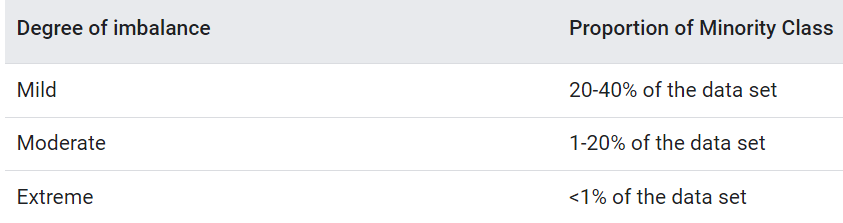

In [64]:
Image(filename='/content/drive/MyDrive/Colab Notebooks/Images/degree of imbalance.png', width=500)

In [160]:
# create a checkpoint by dropping the unnecessary variables (Absenteeism Time in Hours)
data_with_targets = data_preprocessed.drop(['Absenteeism time in hours'], axis=1)

Select inputs for regression model

In [161]:
data_with_targets.shape

(703, 15)

In [162]:
# select all rows except target (Excessively Absent)
inputs = data_with_targets.iloc[:, :-1]

In [165]:
inputs.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Education,Son,Pet,Body mass index
0,0,0,0,1,7,3,289,36,33,239.554,0,2,1,30
1,0,0,0,0,7,3,118,13,50,239.554,0,1,0,31
2,0,0,0,1,7,4,179,51,38,239.554,0,0,0,31
3,1,0,0,0,7,5,279,5,39,239.554,0,2,0,24
4,0,0,0,1,7,5,289,36,33,239.554,0,2,1,30


Standardizing the data using 'StandardScaler()'
Why?

Since data of varying magnitudes can be biased towards high values, there is need to scale all inputs so they can be of the same proportion in terms of magnitude

* This subtracts the mean and divides by the standard deviation variablewise

In [166]:
from sklearn.preprocessing import StandardScaler

In [167]:
# check available columns
inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month of absence',
       'Day of the week', 'Transportation expense',
       'Distance from Residence to Work', 'Age', 'Work load Average/day ',
       'Education', 'Son', 'Pet', 'Body mass index'], dtype=object)

In [168]:
# select columns to omit. These columns are usually categorical
columns_to_omit = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Education', 'Disciplinary failure']

In [169]:
# create the columns to scale by omitting columns in the 'columns_to_omit' variable
columns_to_scale = [x for x in inputs.columns.values if x not in columns_to_omit]

In [170]:
columns_to_scale

['Month of absence',
 'Day of the week',
 'Transportation expense',
 'Distance from Residence to Work',
 'Age',
 'Work load Average/day ',
 'Son',
 'Pet',
 'Body mass index']

In [171]:
# transform numerical values for standardization
inputs['Month of absence'] = StandardScaler().fit_transform(inputs['Month of absence'].values.reshape(len(inputs), 1))
inputs['Day of the week'] = StandardScaler().fit_transform(inputs['Day of the week'].values.reshape(len(inputs), 1))
inputs['Transportation expense'] = StandardScaler().fit_transform(inputs['Transportation expense'].values.reshape(len(inputs), 1))
inputs['Distance from Residence to Work'] = StandardScaler().fit_transform(inputs['Distance from Residence to Work'].values.reshape(len(inputs), 1))
inputs['Age'] = StandardScaler().fit_transform(inputs['Age'].values.reshape(len(inputs), 1))
inputs['Work load Average/day '] = StandardScaler().fit_transform(inputs['Work load Average/day '].values.reshape(len(inputs), 1))
inputs['Son'] = StandardScaler().fit_transform(inputs['Son'].values.reshape(len(inputs), 1))
inputs['Body mass index'] = StandardScaler().fit_transform(inputs['Body mass index'].values.reshape(len(inputs), 1))
inputs['Pet'] = StandardScaler().fit_transform(inputs['Pet'].values.reshape(len(inputs), 1))


In [172]:
inputs.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Education,Son,Pet,Body mass index
0,0,0,0,1,0.171363,-0.621303,0.979992,0.456749,-0.526607,-0.824852,0,0.849628,0.171603,0.802142
1,0,0,0,0,0.171363,-0.621303,-1.558586,-1.107906,2.066505,-0.824852,0,-0.055355,-0.577693,1.038482
2,0,0,0,1,0.171363,0.080909,-0.653011,1.477176,0.236073,-0.824852,0,-0.960338,-0.577693,1.038482
3,1,0,0,0,0.171363,0.783122,0.831537,-1.652134,0.388609,-0.824852,0,0.849628,-0.577693,-0.615895
4,0,0,0,1,0.171363,0.783122,0.979992,0.456749,-0.526607,-0.824852,0,0.849628,0.171603,0.802142


In [173]:
inputs.shape

(703, 14)

# Split data into train and test sets and shuffle


In [174]:
from sklearn.model_selection import train_test_split

In [175]:
# split using 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=3)

In [176]:
# check shape of train features and targets
print(x_train.shape, y_train.shape)

(562, 14) (562,)


In [177]:
# Shape of test features and targets
print(x_test.shape, y_test.shape)

(141, 14) (141,)


## Modelling using logistic regression (lr)

In [178]:
# import model from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [179]:
# initiailize model
lr = LogisticRegression()

# fit model with inputs train set
lr.fit(x_train, y_train)

LogisticRegression()

In [180]:
# check accuracy
lr.score(x_train, y_train)

0.7597864768683275

* the model learns to classify 76% of the total observations correctly

## Finding the bias / intercept(b0) and coefficients/weights (b1)

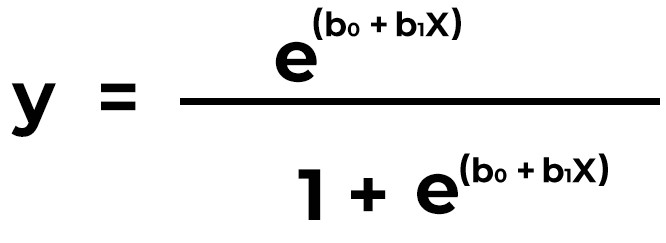

In [87]:
# The Sigmoid function -  How logistic regression works
Image(filename='/content/drive/MyDrive/Colab Notebooks/Images/sigmoid function.jpeg', width=600)

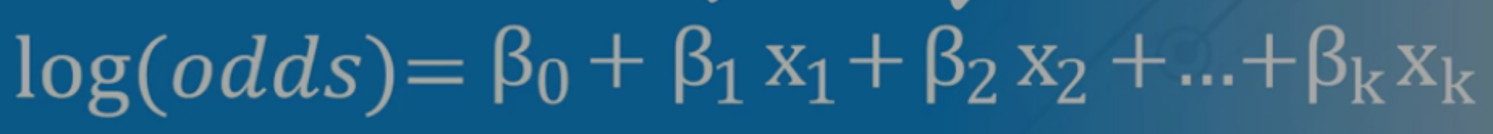

In [88]:
# function of logistic regression
Image(filename='/content/drive/MyDrive/Colab Notebooks/Images/odds sigmoid.png', width=500, height=30)

In [181]:
# intercept (bias) b0
lr.intercept_

array([-1.80891448])

In [182]:
# coefficients/weights
lr.coef_

array([[ 2.85020422,  0.71886003,  2.82723308,  1.14980552,  0.06250557,
        -0.19291628,  0.64758767, -0.0290891 , -0.14666564, -0.0357255 ,
        -0.00822367,  0.38963885, -0.28944526,  0.32754427]])

In [183]:
# getting feature names
inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month of absence',
       'Day of the week', 'Transportation expense',
       'Distance from Residence to Work', 'Age', 'Work load Average/day ',
       'Education', 'Son', 'Pet', 'Body mass index'], dtype=object)

In [184]:
# save feature name
feature_name = inputs.columns.values

In [185]:
# create summary table
summary_table = pd.DataFrame(columns=['Feature name'], data = feature_name)

In [186]:
summary_table.head(2)

,Feature name
0,Reason_1
1,Reason_2


In [187]:
# add the coefficients to the summary table
summary_table['Coefficient'] = np.transpose(lr.coef_)

In [188]:
summary_table.head(2)

,Feature name,Coefficient
0,Reason_1,2.850204
1,Reason_2,0.718860


In [189]:
# the intercept should be at the top
# move index by 1 step
summary_table.index = summary_table.index + 1
summary_table.head(2)

,Feature name,Coefficient
1,Reason_1,2.850204
2,Reason_2,0.718860


In [190]:
# add the intercept at index 0
summary_table.loc[0] = ['intercept', lr.intercept_[0]]

In [191]:
summary_table.head(2)

,Feature name,Coefficient
1,Reason_1,2.850204
2,Reason_2,0.718860


In [192]:
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficient
0,intercept,-1.808914
1,Reason_1,2.850204
2,Reason_2,0.718860
3,Reason_3,2.827233
4,Reason_4,1.149806
5,Month of absence,0.062506
6,Day of the week,-0.192916
7,Transportation expense,0.647588
8,Distance from Residence to Work,-0.029089
9,Age,-0.146666


* the closer the weights(coefficient) to 0, the smaller the weights

## Interpreting coefficients


In [193]:
# from the logistic function above,
# log(odds) = b0 + b1x1 + b2x2 + ... + bkxk
# odds ratio = np.exp(b0 + b1x1 + ... + bkxk)
# add Odds_ratio
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)

In [194]:
# sort the table to ascending order of Odds_ratio's
summary_table.sort_values('Odds_ratio', ascending=False)

,Feature name,Coefficient,Odds_ratio
1,Reason_1,2.850204,17.291313
3,Reason_3,2.827233,16.898639
4,Reason_4,1.149806,3.157579
2,Reason_2,0.718860,2.052093
7,Transportation expense,0.647588,1.910925
12,Son,0.389639,1.476447
14,Body mass index,0.327544,1.387556
5,Month of absence,0.062506,1.064500
11,Education,-0.008224,0.991810
8,Distance from Residence to Work,-0.029089,0.971330


# Feature Importance Discussion
We can use Coefficients and Odds ratio to determine feature importance

Magnitude of Coefficient:
Larger Absolute Value:
* Indicates a stronger effect on the log(odds).

Smaller Absolute Value:
* Suggests a weak or negligible effect on the log(odds).

Odds Ratio (OR):
* OR Far from 1 (either > 1 or < 1):
Implies the feature strongly impacts the odds.

Example: OR = 3 (triples the odds), OR = 0.2 (reduces odds by 80%).

* OR Close to 1:
Minimal impact on the odds, indicating the feature is less important.

A feature is not considered important if
* It's odds ratio (OR) is close to 1, and it's coefficient is close to 0

Features with Minimal Impact:

The variables whose coefficients are near 0 and odds ratios are around 1 can be considered less useful for the model:

* Education (Coefficient: -0.008, Odds Ratio: 0.992) - almost no effect on absenteeism.

* Month of Absence (Coefficient: 0.062, Odds Ratio: 1.065) - very minimal impact on absenteeism.

* Distance from Residence to Work (Coefficient: -0.029, Odds Ratio: 0.971) - slightly reduces the odds of absenteeism.

* Work Load Average/day (Coefficient: -0.036, Odds Ratio: 0.965) - small negative impact on absenteeism.

* Body Mass Index (Coefficient: 0.328, Odds Ratio: 1.388) - minor positive impact on absenteeism.

Evaluating the "Pet" Feature:

* The Pet variable has a negative coefficient (-0.289) and an odds ratio of 0.749, indicating that having a pet decreases the odds of excessive absence by approximately 25.1% compared to the baseline. Despite being at the bottom of the table, the feature is still moderately important because its coefficient is not too close to 0.

Interpreting Significant Features:

The further a coefficient is from 0, the more influential the feature becomes. The features with the highest odds ratios that impact absenteeism are:

* Reason 1 (Diseases): Coefficient: 2.85, Odds Ratio: 17.29 - significantly increases the odds of absenteeism.

* Reason 3 (Poisoning): Coefficient: 2.83, Odds Ratio: 16.90 - also highly increases absenteeism risk.

* Reason 4 (Light reasons for absence): Coefficient: 1.15, Odds Ratio: 3.16 - moderately increases absenteeism.

* Reason 2 (Pregnancy): Coefficient: 0.72, Odds Ratio: 2.05 - somewhat increases absenteeism.

Among these, Reason 1 (Diseases) and Reason 3 (Poisoning) are the most crucial for predicting excessive absenteeism, as they significantly increase the odds. For instance, diseases increase the odds of being excessively absent by about 17 times compared to the baseline.

Noteworthy Variable:

* Transportation Expense has a coefficient of 0.65 and an odds ratio of 1.91, indicating that for every one standard deviation increase in transportation expense, the odds of excessive absenteeism increase by approximately 91%.

* Son: The feature Son has a positive coefficient (0.39) and an odds ratio of 1.48, indicating that having a son slightly increases the odds of excessive absenteeism by 48%.

Conclusion:

* While some features have limited impact, others like specific reasons for absence and transportation expenses are highly influential. We should consider retaining even the less impactful features for now, as they might become more relevant when interacting with other variables or when analyzed in combination.

Backward Elimination:
We can simplify our model by removing those features that have close to no contribution to our model (least important features) by using weights

In [204]:
# Drop the weak variables
data_with_targets2 = data_preprocessed.drop([
                      'Absenteeism time in hours',
                      'Month of absence',
                      'Distance from Residence to Work',
                      'Work load Average/day ',
                      'Education',
                      'Body mass index'
                       ], axis=1)

In [205]:
data_with_targets2[:3]

,Reason_1,Reason_2,Reason_3,Reason_4,Day of the week,Transportation expense,Age,Son,Pet,Excessively Absent
0,0,0,0,1,3,289,33,2,1,1
1,0,0,0,0,3,118,50,1,0,0
2,0,0,0,1,4,179,38,0,0,0


In [206]:
# select all rows except target (Excessively absent)
unscaled_inputs2 = data_with_targets2.iloc[:, :-1]

In [207]:
unscaled_inputs2.head(2)

,Reason_1,Reason_2,Reason_3,Reason_4,Day of the week,Transportation expense,Age,Son,Pet
0,0,0,0,1,3,289,33,2,1
1,0,0,0,0,3,118,50,1,0


In [208]:
# select columns to omit
columns_to_omit = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']


# create columns to scale by omitting columns in columns_to_omit
columns_to_scale2= [x for x in unscaled_inputs2.columns.values if x not in columns_to_omit]
columns_to_scale2

['Day of the week', 'Transportation expense', 'Age', 'Son', 'Pet']

In [209]:
unscaled_inputs2.head(2)

,Reason_1,Reason_2,Reason_3,Reason_4,Day of the week,Transportation expense,Age,Son,Pet
0,0,0,0,1,3,289,33,2,1
1,0,0,0,0,3,118,50,1,0


In [213]:
#transform numerical value for standardization
unscaled_inputs2['Day of the week_std'] = StandardScaler().fit_transform(unscaled_inputs2['Day of the week'].values.reshape(len(unscaled_inputs2),1))
unscaled_inputs2['Transportation Expense_std'] = StandardScaler().fit_transform(unscaled_inputs2['Transportation expense'].values.reshape(len(unscaled_inputs2),1))
unscaled_inputs2['Age_std'] = StandardScaler().fit_transform(unscaled_inputs2['Age'].values.reshape(len(unscaled_inputs2),1))
unscaled_inputs2['Son_std'] = StandardScaler().fit_transform(unscaled_inputs2['Son'].values.reshape(len(unscaled_inputs2),1))
unscaled_inputs2['Pet_std'] = StandardScaler().fit_transform(unscaled_inputs2['Pet'].values.reshape(len(unscaled_inputs2),1))

In [214]:
scaled_inputs2 = unscaled_inputs2.copy()

In [215]:
scaled_inputs2.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Day of the week,Transportation expense,Age,Son,Pet,Day of the week_std,Transportation Expense_std,Age_std,Son_std,Pet_std
0,0,0,0,1,3,289,33,2,1,-0.621303,0.979992,-0.526607,0.849628,0.171603
1,0,0,0,0,3,118,50,1,0,-0.621303,-1.558586,2.066505,-0.055355,-0.577693
2,0,0,0,1,4,179,38,0,0,0.080909,-0.653011,0.236073,-0.960338,-0.577693
3,1,0,0,0,5,279,39,2,0,0.783122,0.831537,0.388609,0.849628,-0.577693
4,0,0,0,1,5,289,33,2,1,0.783122,0.979992,-0.526607,0.849628,0.171603


In [216]:
columns_to_scale2 = ['Day of the week', 'Transportation expense', 'Age', 'Son', 'Pet']

In [217]:
# drop unscaled columns
scaled_inputs2.drop(columns = columns_to_scale2, inplace=True)

In [219]:
scaled_inputs2 = scaled_inputs2.reset_index()

In [221]:
scaled_inputs2.drop(columns='index', inplace=True)

In [222]:
# Do train-test split on dataset using 80:20
x_train2, x_test2, y_train2, y_test2 = train_test_split(scaled_inputs2, targets, test_size=0.2, random_state= 3)

In [223]:
# create another logistic regression (lr) model
lr2 = LogisticRegression()

# fit train inputs
lr2.fit(x_train2, y_train2)

LogisticRegression()

In [224]:
# save feature names
feature_name2 = scaled_inputs2.columns.values

In [228]:
# create summary table
summary_table2 = pd.DataFrame(columns=['Feature name'], data = feature_name2)

# add coefficients to the summary table
summary_table2['Coefficient'] = np.transpose(lr2.coef_)

# intercept should be at the top
# move index by 1 step
summary_table.index = summary_table.index + 1

# add intercept at index 0
summary_table2.loc[0] = ['Intercept', lr2.intercept_[0]]

summary_table2 = summary_table2.sort_index()

In [229]:
# add Odd_ratio
summary_table2['Odds_ratio'] = np.exp(summary_table2.Coefficient)

# sort the table according to odds ratio in descending order
summary_table.sort_values('Odds_ratio', ascending=False)

,Feature name,Coefficient,Odds_ratio
3,Reason_1,2.850204,17.291313
5,Reason_3,2.827233,16.898639
6,Reason_4,1.149806,3.157579
4,Reason_2,0.718860,2.052093
9,Transportation expense,0.647588,1.910925
14,Son,0.389639,1.476447
16,Body mass index,0.327544,1.387556
7,Month of absence,0.062506,1.064500
13,Education,-0.008224,0.991810
10,Distance from Residence to Work,-0.029089,0.971330


In [230]:
# check accuracy of the model
lr2.score(x_train2, y_train2)

0.7419928825622776

* Prior to dropping variables with weak or no impact, the model's accuracy was approx. 76%
* After dropping weak variables, accuracy becomes 0.74%
* This means that those variables dropped are irrelevant because the new result is slightly different.. Just a small error of 0.02

## Testing the model

In [231]:
# test accuracy of model
lr2.score(x_test2, y_test2)

0.7163120567375887

* After feeding the model with data it's not seen before, for 72% of the cases, the model will predict if a person is going to be excessively absent

### Reguarization

Finding the best regularization strength (C) for the logistic regression model by testing multiple values and validating with cross-validation



In [263]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [5, 7, 9, 10, 15]}
model = LogisticRegression(penalty='l1', solver='liblinear')
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(x_train2, y_train2)

print(f"Best C: {grid.best_params_['C']}")
print(f"Best Cross-Validation Score: {grid.best_score_}")


Best C: 5
Best Cross-Validation Score: 0.7490992414664982


In [264]:
lr3= LogisticRegression(C=10, penalty='l2', solver='liblinear')
lr3.fit(x_train2, y_train2)


LogisticRegression(C=10, solver='liblinear')

In [265]:
test_accuracy = lr3.score(x_test2, y_test2)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.7234


Improved test accuracy from 71.6% to 72.3%

It shows the model generalizes a bit better with the optimal regularization parameter.

In [247]:
# predicted probabilities of each class
predicted_proba = lr3.predict_proba(x_test2)

In [248]:
# thre 1st column shows prob of a particular observation to be 0, while the second column - to be 1
predicted_proba[:5]

array([[0.8536879 , 0.1463121 ],
       [0.09651484, 0.90348516],
       [0.582939  , 0.417061  ],
       [0.3393368 , 0.6606632 ],
       [0.82811255, 0.17188745]])

In [249]:
predicted_proba.shape

(141, 2)

In [250]:
# select only predictions referring to 1s
predicted_proba[:, 1]

array([0.1463121 , 0.90348516, 0.417061  , 0.6606632 , 0.17188745,
       0.33306986, 0.3901009 , 0.3901009 , 0.50278237, 0.67263366,
       0.1463121 , 0.05790176, 0.46532525, 0.28814313, 0.63170954,
       0.69039859, 0.60994   , 0.18984864, 0.68028929, 0.30910734,
       0.51081568, 0.23709387, 0.28814313, 0.93092243, 0.39189041,
       0.51000658, 0.13133075, 0.82548348, 0.54818031, 0.28814313,
       0.46532525, 0.49377745, 0.60773609, 0.74740854, 0.16339445,
       0.89228155, 0.65021795, 0.89228155, 0.16339445, 0.28814313,
       0.24601087, 0.12498852, 0.53347328, 0.58800834, 0.6294725 ,
       0.63127642, 0.30922268, 0.47938541, 0.31662724, 0.21946231,
       0.95098299, 0.23456983, 0.76666358, 0.53352442, 0.73246592,
       0.18984864, 0.21946231, 0.91546112, 0.21826722, 0.03019787,
       0.34942574, 0.21946231, 0.33648612, 0.6209593 , 0.53226485,
       0.76121931, 0.74734537, 0.76666358, 0.68321627, 0.57614361,
       0.36655446, 0.23709387, 0.1463121 , 0.91546112, 0.51081

Save model

In [251]:
import pickle

In [252]:
# serialize the model fie
with open('lr_model.pkl', 'wb') as f:
  pickle.dump(lr3, f)